In [1]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Set working directory
os.chdir("F:/Edwisor/Employee_Absenteeism")

In [3]:
# Check working directory
os.getcwd()

'F:\\Edwisor\\Employee_Absenteeism'

In [4]:
# Load the excel data
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
#getting structure of the data
type(df)

pandas.core.frame.DataFrame

In [6]:
#getting columns data
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
#getting data-types of all the variables/columns
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [8]:
#getting total no of rows and columns in the data
df.shape

(740, 21)

In [9]:
#getting no. of unique values present in each of the variable/column
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

# PERFORMING EXPLORATORY DATA ANALYSIS

#analysing data to segregate between categorical and continuous variables
df.head()

In [10]:
#analysing data to segregate between categorical and continuous variables
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [11]:
# Segregate continuous and categorical variables
cont_var = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

cat_var = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']



# DATA PRE-PROCESSING-->PERFORMING MISSING VALUE ANALYSIS


In [16]:
#Creating data-frame with  the missing values present in each of the variables
missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Saving output result into csv file
missing_val.to_csv("Missing_perc.csv", index = False)

# Methods of Imputation

In [17]:
# Droping observation in which "Absenteeism time in hours" has missing value
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [18]:
df['Body mass index'].iloc[12]

31.0

In [51]:
# Checking for "Body mass index" column
# Actual value = 31
# Mean = 26.68
# Median = 25
# KNN = 30.99


#create missing value
df['Body mass index'].iloc[12] = np.nan

C:\Users\hp word\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [127]:
# # Impute with mean
df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].mean())
df['Body mass index'].iloc[12]

# Impute with median
df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].median())
df['Body mass index'].iloc[12]



26.70083378372634

In [50]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df)
data_with_imputed_values

array([[ 11.,  26.,   7., ..., 172.,  30.,   4.],
       [ 36.,   0.,   7., ..., 178.,  31.,   0.],
       [  3.,  23.,   7., ..., 170.,  31.,   2.],
       ...,
       [  4.,   0.,   0., ..., 170.,  34.,   0.],
       [  8.,   0.,   0., ..., 170.,  35.,   0.],
       [ 35.,   0.,   0., ..., 175.,  25.,   0.]])

In [95]:
from sklearn.model_selection import train_test_split

In [105]:
data_df = pd.DataFrame(df)
data_df.replace(to_replace='NaN', value=0, inplace=True)
data_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.000000,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.000000,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.000000,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.000000,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.000000,2.0
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.000000,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.000000,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.000000,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.000000,8.0
10,20,1.0,7.0,2,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.000000,8.0


In [132]:
def replace_missing_value(df, number_features):
    number_features = ['Body mass index','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours','Pet','ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Son']
    imputer = Imputer(strategy="knn")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    df1 = res_def
    df1.isnull().sum().sum()

In [ ]:
# Making a list of missing value types 
missing_values = ["NaN","nan"," "]
#df1 = pd.read_excel("Absenteeism_at_work_Project.xls", na_values = missing_values)
median = df1.median()
df1.fillna(median, inplace=True)

In [119]:
df['Body mass index'].iloc[12]

26.70083378372634

In [ ]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)

In [168]:
# Checking if all the missing value imputed
df1.isnull().sum().sum()

0

# OUTLIER ANALYSIS

Text(0, 0.5, 'Values')

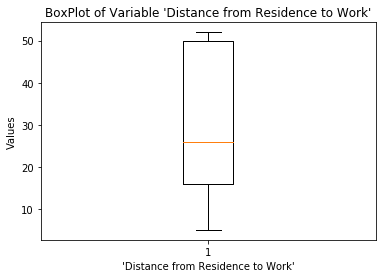

In [169]:
# Ploting BoxPlot of continuous variables
plt.boxplot(df1['Distance from Residence to Work'])
plt.xlabel("'Distance from Residence to Work'")
plt.title("BoxPlot of Variable 'Distance from Residence to Work'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

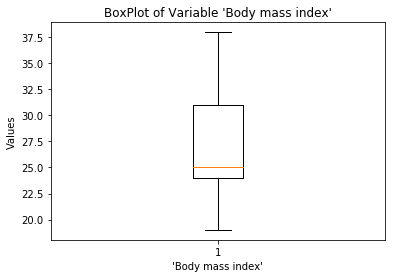

In [170]:
plt.boxplot(df1['Body mass index'])
plt.xlabel("'Body mass index'")
plt.title("BoxPlot of Variable 'Body mass index'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

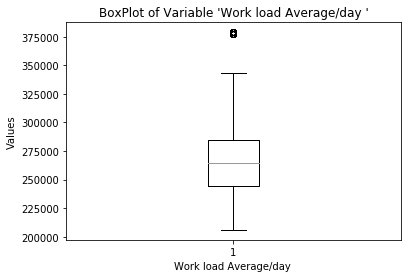

In [171]:
plt.boxplot(df1['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

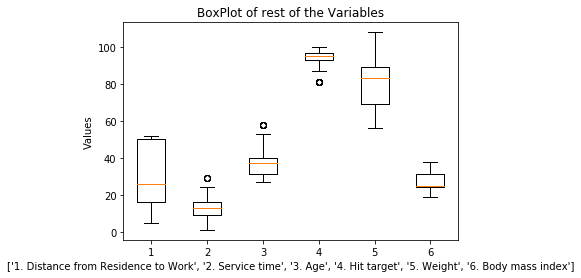

In [172]:
plt.boxplot([ df1['Distance from Residence to Work'], df1['Service time'], df1['Age'], df1['Hit target'], df1['Weight'], df1['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [176]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuou variables to detect and remove Outliers
for i in cont_var:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df1[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df1.loc[df1[i]< minimum,i] = np.nan
    df1.loc[df1[i]> maximum,i] = np.nan




32

In [175]:
# Making a list of missing value types
missing_values = ["NaN","nan"," "]
#df1 = pd.read_excel("Absenteeism_at_work_Project.xls", na_values = missing_values)
median = df1.median()
df1.fillna(median, inplace=True)

In [ ]:
# Imputing missing values with KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)
# Checking if there is any missing value
df1.isnull().sum().sum()

# FEATURE SELECTION

In [178]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df1.loc[:,cont_var]

[]

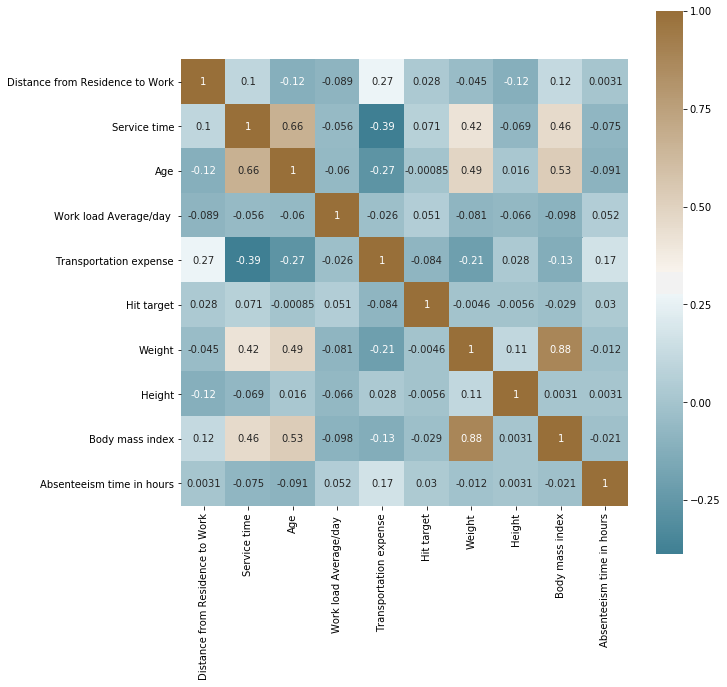

In [179]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [209]:
#loop for ANOVA test Since the target variable is continuous
for i in cat_var:
    f, p = stats.f_oneway(df[i], df1["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))
   

In [182]:
# Droping the variables which has redundant information
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [183]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
cont_var = [i for i in cont_var if i not in to_drop]
cat_var = [i for i in cat_var if i not in to_drop]

In [184]:
clean_data = df1.copy()

# FEATURE SCALING

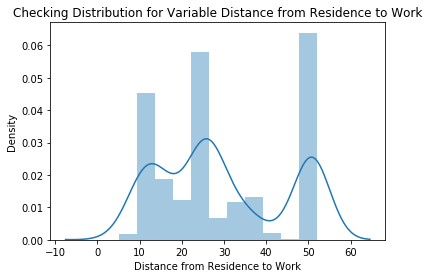

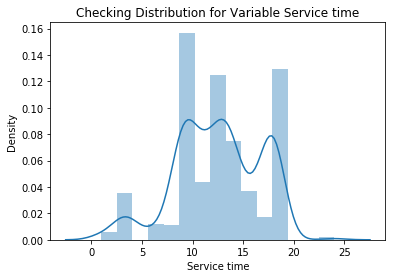

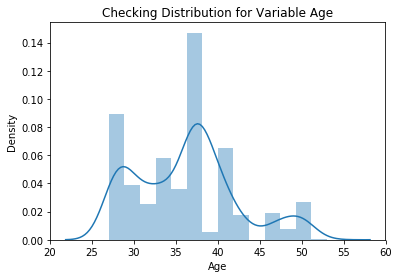

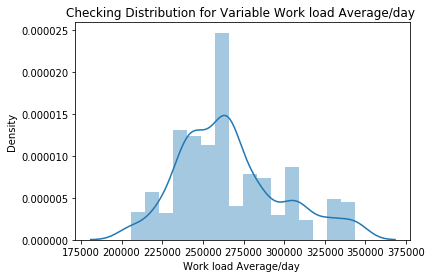

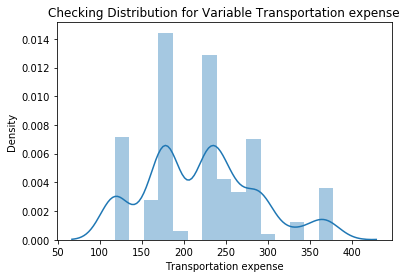

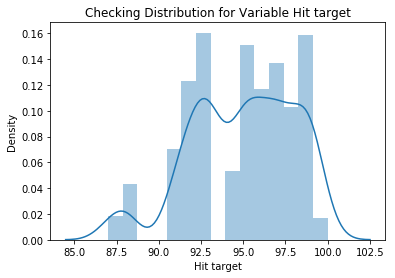

ValueError: autodetected range of [nan, nan] is not finite

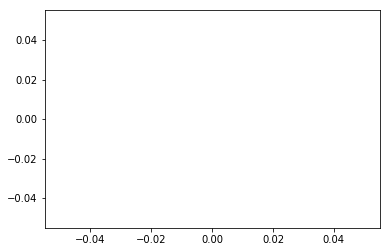

In [189]:
# Checking if there is any normally distributed variable in data
for i in cont_var:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df1[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

# APPLYING ML(MACHINE LEARNING) TECHNIQUES

In [190]:
# Get dummy variables for categorical variables
df1 = pd.get_dummies(data = df1, columns = cat_var)

# Copying dataframe
df2 = df1.copy()

In [191]:
df1.iloc[:,8].head()

0    30.0
1    31.0
2    31.0
3    24.0
4    30.0
Name: Body mass index, dtype: float64

In [192]:
df1.iloc[:, df1.columns != 'Absenteeism time in hours'].head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,ID_1,...,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,0,...,1,0,0,0,0,0,0,1,0,0


In [193]:
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df1.iloc[:, df1.columns != 'Absenteeism time in hours'], df1.iloc[:, 8], test_size = 0.20)

# implementation of DECISION TREE

In [195]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# implementation of Random Forest

In [ ]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

 Boosting Gradient# implementation of Linear Regression

In [ ]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# Implementing Gradient Boosting

In [ ]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# Dimensionality Reduction using PCA

In [196]:
target = df1['Absenteeism time in hours']

In [198]:
df1.drop(['Absenteeism time in hours'], inplace = True, axis=1)
df1.shape

(740, 116)

In [200]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = df2.values

# Data has 129 variables so no of components of PCA = 129
pca = PCA(n_components=129)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [ ]:
# From the above plot selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

# Decision Tree again


In [ ]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# Random Forest again

In [ ]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# Linear Regression again

In [ ]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# Gradient Boosting again

In [ ]:
# Importing library for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

# Visual Analysis on Cleaned Data

In [203]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [ ]:
# For Notebooks purpose
init_notebook_mode(connected=True)

# Relationship of "Absenteeism time in hours" with others

In [205]:
# Histogram plot
clean_data.iplot(kind='hist',y='Absenteeism time in hours',bins='100')